---

# <center>★ AI / ML Lesson - Building Keras Models★

---

<center><img src="keras_models.png" style="width: 1000px;"/>

---

### Description:

Keras is one of the most popular Python libraries for Deep Learning. It is a library that provides you various tools to deal with neural network models. These tools enable you to visualize and understand your model.
Keras is a simple and user-friendly library that focuses on the idea of Models. Let us learn more about Keras Models.

There are three ways to create Keras models:
The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
The Functional API, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.
Model subclassing, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.

### Acknowledgement: 
google, pyimagesearch, coursera, udemy, machinelearningmastery

### Objective:
- Build Deep Neural Network by using various types of Keras models.

---

# <center> Keras Models:

**There are three ways to create Keras models:**

1. The Sequential Model
2. The Functional API
3. Model Subclassing

---

# <center>1. Sequential Model

It allows us to create models layer by layer in sequential order. But it does not allow us to create models that have multiple inputs or outputs. It is best for simple stack of layers which have 1 input tensor and 1 output tensor.

This model is not suited when any of the layer in the stack has multiple inputs or outputs. Even if we want non-linear topology, it is not suited.

Here is an example for Sequential model:

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 64)                704       
                                                                 
 dense_166 (Dense)           (None, 32)                2080      
                                                                 
Total params: 2,784
Trainable params: 2,784
Non-trainable params: 0
_________________________________________________________________


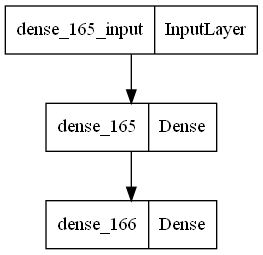

In [56]:
#Importing the basic librarires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

"""Constructing a simple model architecture using Sequential Model"""

## Method 1
model=tf.keras.models.Sequential([
    Dense(64, input_shape=(10,), activation='relu'),
    Dense(32, activation='softmax')
])

## Method 2
model=tf.keras.models.Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(Dense(32))

# Viewing the model summary
model.summary()
tf.keras.utils.plot_model(model)

---

# <center>2. The Functional API

It provides more flexibility to define a model and add layers in keras. Functional API allows us to create models that have multiple input or output. It also allows us to share these layers. In other words. we can make graphs of layers using Keras functional API.

As functional API is a data structure, it is easy to save it as a single file that helps in recreating the exact model without having the original code. Also its easy to model the graph here and access its nodes as well.

Below is the Example for Functional API:

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_65 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_167 (Dense)           (None, 32)                1056      
                                                                 
 dense_168 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


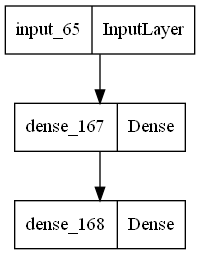

In [57]:
#Importing the basic librarires
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

"""Constructing a simple model architecture using Functional API"""

input_1=Input(shape=(32,))
hidden_1=Dense(32, activation='relu')(input_1)
output_1 = Dense(1, activation='linear')(hidden_1)
model=Model(inputs=[input_1],outputs=[output_1])

# Viewing the model summary
model.summary()
tf.keras.utils.plot_model(model)

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_69 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 input_70 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_71 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 dense_177 (Dense)              (None, 256)          25856       ['input_69[0][0]']               
                                                                                           

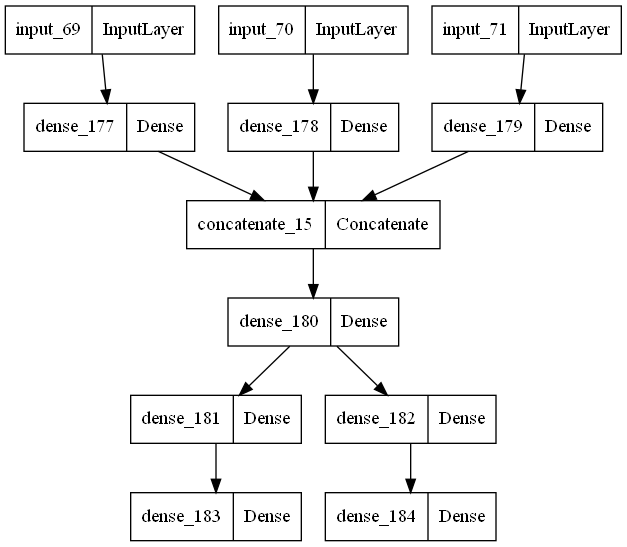

In [59]:
"""Constructing a complex model architecture using Functional API with multiple inputs & outputs"""

input_1a=Input(shape=(100,))
input_1b=Input(shape=(200,))
input_1c=Input(shape=(300,))

hidden_1a=Dense(256, activation='relu')(input_1a)
hidden_1b=Dense(128, activation='relu')(input_1b)
hidden_1c=Dense(64, activation='relu')(input_1c)

merged_1 = Concatenate(axis=1)([hidden_1a, hidden_1b, hidden_1c])

hidden_2=Dense(32, activation='relu')(merged_1)
hidden_3a=Dense(8, activation='relu')(hidden_2)
hidden_3b=Dense(8, activation='relu')(hidden_2)
output_1a = Dense(2, activation='sigmoid')(hidden_3a)
output_1b = Dense(1, activation='linear')(hidden_3b)

#To create model with multiple inputs and outputs:
model=Model(inputs=[input_1a, input_1b, input_1c],outputs=[output_1a, output_1b])

model.summary()
tf.keras.utils.plot_model(model)

---

# <center>3. Model Subclassing

Sequential model does not allow you much flexibility to create your models. Functional API also only has a little of customization available for you. But you may create your own fully-customizable models in Keras. 

This is done by subclassing the Model class and implementing a call method.

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 50)]              0         
                                                                 
 dense_201 (Dense)           (None, 32)                1632      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_202 (Dense)           (None, 10)                330       
                                                                 
Total params: 2,090
Trainable params: 2,026
Non-trainable params: 64
_______________________________________________________

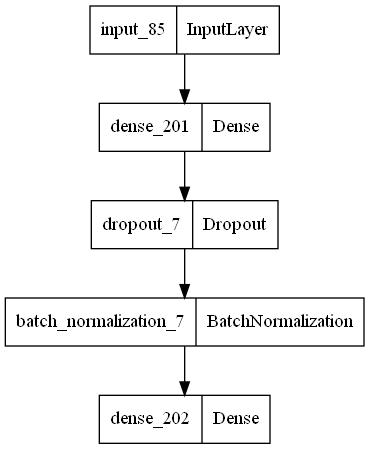

In [86]:
import tensorflow as tf
from keras.layers import Dense,Dropout,BatchNormalization

class Subclass(tf.keras.Model):

    def __init__(self, use_bn=True, use_dp=True, num_classes=10):
        super(Subclass, self).__init__(name='mlp')
        self.use_bn = use_bn
        self.use_dp = use_dp
        self.num_classes = num_classes

        self.dense_1 = Dense(32, activation='relu')
        self.dense_2 = Dense(num_classes, activation='softmax')
        if self.use_dp:
            self.dp = Dropout(0.5)
        if self.use_bn:
            self.bn = BatchNormalization(axis=-1)

    def call(self, inputs):
        x = self.dense_1(inputs)
        if self.use_dp:
            x = self.dp(x)
        if self.use_bn:
            x = self.bn(x)
        x = self.dense_2(x)
        return x
    
    def model(self):
        x = Input(shape=(50,))
        model = Model(inputs=[x], outputs=[self.call(x)])
        return model

MyModel = Subclass()
MyModel.model().summary()
tf.keras.utils.plot_model(MyModel.model())

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The custom dataset had 1k samples out which 800 were used for training & 200 were used for testing purpose.
- Visualising the samples & it's distribution, helped us to get some insights into the dataset.
- The Vanilla Neural Network Architecture with default learning rate for Adam Optimizer did not perform so well, given the low complexity of data, it took too long to converge.
- Hence finding the optimal learning rate by tuning it, helped to us to build better model with optimal training time.
- Further improvisations can include the usage of cmplex layers like CNN, adding dropouts & batch-normalization layers, or even utilizing the Transfer Learning Methodology to train Prominent Models like VGG, ResNet, AlexNet, GoogleNet, Etc.

In [1]:
#<<<--------------------------------------THE END---------------------------------------->>>